In [1]:
import pandas as pd
import numpy as np

### 데이터 병합

In [7]:
# DataFrame 만드는 방법
df_a = pd.DataFrame({'key': ['a','b','c','d','e'],'num_a': [1,2,3,4,5]})
df_b = pd.DataFrame({'key': ['a','b','d','f','g'],'num_b': [11,15,35,45,55]})
df_c = pd.DataFrame({'key': ['f','g','h','i','j'],'num_a': [6,7,8,9,0]})

In [8]:
df_a

,key,num_a
0,a,1
1,b,2
2,c,3
3,d,4
4,e,5


In [9]:
df_b

,key,num_b
0,a,11
1,b,15
2,d,35
3,f,45
4,g,55


In [10]:
df_c

,key,num_a
0,f,6
1,g,7
2,h,8
3,i,9
4,j,0


In [16]:
# df_a와 df_b를 합치는 함수 concat()
# concat() 안에 리스트 형태로 합치고자 하는 변수 넣기
# 위아래로 붙이는 함수
pd.concat([df_a,df_b])

,key,num_a,num_b
0,a,1.0,NaN
1,b,2.0,NaN
2,c,3.0,NaN
3,d,4.0,NaN
4,e,5.0,NaN
0,a,NaN,11.0
1,b,NaN,15.0
2,d,NaN,35.0
3,f,NaN,45.0
4,g,NaN,55.0


In [17]:
pd.concat([df_a,df_c])

,key,num_a
0,a,1
1,b,2
2,c,3
3,d,4
4,e,5
0,f,6
1,g,7
2,h,8
3,i,9
4,j,0


In [18]:
# index는 새롭게 지정되지 않아서 원래의 데이터프레임 인덱스를 가져간다.
# 이 부분 index는 이후에 다룬다.

In [19]:
pd.concat([df_a,df_b,df_c])

,key,num_a,num_b
0,a,1.0,NaN
1,b,2.0,NaN
2,c,3.0,NaN
3,d,4.0,NaN
4,e,5.0,NaN
0,a,NaN,11.0
1,b,NaN,15.0
2,d,NaN,35.0
3,f,NaN,45.0
4,g,NaN,55.0


In [22]:
pd.concat([df_a,df_b], axis=1)
# axis=1 은 가로로 붙여진다.

,key,num_a,key,num_b
0,a,1,a,11
1,b,2,b,15
2,c,3,d,35
3,d,4,f,45
4,e,5,g,55


In [23]:
pd.concat([df_a,df_b,df_c], axis=1)

,key,num_a,key,num_b,key,num_a
0,a,1,a,11,f,6
1,b,2,b,15,g,7
2,c,3,d,35,h,8
3,d,4,f,45,i,9
4,e,5,g,55,j,0


In [34]:
# merge
# key가 하나도 합쳐져있다.
# 기본적으로 inner join으로 합쳐진다.
# 공통적으로 가지고 있는 컬럼을 기준으로 합친다.
# df_a.merge(df.b, how='inner')와 같은 출력 결과를 가진다.
# df_a, df_b에 공통으로 key컬럼이 들어있어서 자동으로 key를 기준으로 합친다.
# 기준을 변경하려면 on 이라는 파라미터를 활용한다.
df_a.merge(df_b)

,key,num_a,num_b
0,a,1,11
1,b,2,15
2,d,4,35


In [35]:
df_a.merge(df_b, how='outer')

,key,num_a,num_b
0,a,1.0,11.0
1,b,2.0,15.0
2,c,3.0,NaN
3,d,4.0,35.0
4,e,5.0,NaN
5,f,NaN,45.0
6,g,NaN,55.0


In [36]:
df_a.merge(df_b, how='left')

,key,num_a,num_b
0,a,1,11.0
1,b,2,15.0
2,c,3,NaN
3,d,4,35.0
4,e,5,NaN


In [37]:
df_a.merge(df_b, how='right')

,key,num_a,num_b
0,a,1.0,11
1,b,2.0,15
2,d,4.0,35
3,f,NaN,45
4,g,NaN,55


In [38]:
df_a.merge(df_b, on='key', how='inner')

,key,num_a,num_b
0,a,1,11
1,b,2,15
2,d,4,35


In [42]:
df_a = pd.DataFrame({'key': ['a','b','c','d','e'],'id': ['q','w','e','r','t'], 'num_a': [1,2,3,4,5]})
df_b = pd.DataFrame({'key': ['a','b','d','f','g'],'id': ['r','t','z','x','y'], 'num_b': [11,15,35,45,55]})

In [44]:
df_a.merge(df_b)

,key,id,num_a,num_b


In [45]:
df_a.merge(df_b, on='key')

,key,id_x,num_a,id_y,num_b
0,a,q,1,r,11
1,b,w,2,t,15
2,d,r,4,z,35


In [46]:
df_a.merge(df_b, on='id')

,key_x,id,num_a,key_y,num_b
0,d,r,4,a,11
1,e,t,5,b,15


In [47]:
df_a = pd.DataFrame({'key': ['a','b','c','d','e'], 'num_a': [1,2,3,4,5]})
df_b = pd.DataFrame({'id': ['a','b','d','f','g'], 'num_b': [11,15,35,45,55]})

In [48]:
# key or id를 rename으로 하여 같은 컬럼명으로 변경하거나
# left_on, right_on 으로 지정하기
df_a.merge(df_b, left_on='key', right_on='id')

,key,num_a,id,num_b
0,a,1,a,11
1,b,2,b,15
2,d,4,d,35


In [181]:
df_a = pd.DataFrame({'key': ['a','b','c','d','e'], 'num': [1,2,3,4,5]})
df_b = pd.DataFrame({'key': ['a','b','d','f','g'], 'num': [11,15,35,45,55]})

In [182]:
df_a

,key,num
0,a,1
1,b,2
2,c,3
3,d,4
4,e,5


In [183]:
df_b

,key,num
0,a,11
1,b,15
2,d,35
3,f,45
4,g,55


In [186]:
# join
# 공통된 컬럼이 아니라 따로 우리가 지정해주어야 한다.
# 공통된 컬럼으로 합치는 것이 아니라 concat() 과 같은 결과로 출력된다.

# df_a.join(df_b) ValueError
# 조인이니까 인덱스를 기준으로 병합을 하되
# key컬럼이 중복되니까 접미사를 붙여서 구분
# num컬럼명도 중복된다면 동일한 접미사로 적용되어 구분

df_a.join(df_b, lsuffix='_1', rsuffix='_2')

,key_1,num_1,key_2,num_2
0,a,1,a,11
1,b,2,b,15
2,c,3,d,35
3,d,4,f,45
4,e,5,g,55


In [67]:
# index에 key값이 들어가게 하려면
# df_a = df_a.set_index('key')
# df_b = df_b.set_index('key')

In [68]:
df_a.join(df_b)

,num_a,num_b
key,,
a,1,11.0
b,2,15.0
c,3,NaN
d,4,35.0
e,5,NaN


## concat() 위아래로 합치기 가능 axis=1 하면 가로로 합치기 가능
## merge() & join() : 기준을 가지고 데이터 합치기, how파라미터로 inner, left, outer, right 가능
- merge() : 컬럼으로 합치기, on파라미터로 하나 컬럼 그 이상도 합치기 가
- join() : 인덱스로 합치기


In [69]:
salary_1 = pd.read_csv('salary_1.csv')
salary_2 = pd.read_csv('salary_2.csv')

In [70]:
salary_1.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Country,Race,Senior
0,32.0,Male,1,Software Engineer,5.0,90000,UK,White,0
1,28.0,Female,2,Data Analyst,3.0,65000,USA,Hispanic,0
2,45.0,Male,3,Manager,15.0,150000,Canada,White,1
3,36.0,Female,1,Sales Associate,7.0,60000,USA,Hispanic,0
4,52.0,Male,2,Director,20.0,200000,USA,Asian,0


In [71]:
salary_2.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Country,Race,Senior
0,29,Female,1,Human Resources Coordinator,2,45000,China,Chinese,0
1,23,Male,0,Sales Associate,1,25000,USA,Asian,0
2,32,Female,2,Software Developer,7,90000,USA,African American,0
3,44,Male,1,Operations Manager,18,170000,USA,Hispanic,0
4,26,Female,1,Marketing Coordinator,2,40000,Canada,Asian,0


In [72]:
# 모델링 기준으로 설명
# 데이터 분석으로 설명

In [73]:
salary_df = pd.concat([salary_1, salary_2])

In [76]:
salary_df.loc[0]
# 인덱스가 0인 부분이 중복이다.

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Country,Race,Senior
0,32.0,Male,1,Software Engineer,5.0,90000,UK,White,0
0,29.0,Female,1,Human Resources Coordinator,2.0,45000,China,Chinese,0


In [83]:
salary_df.reset_index(drop=True, inplace = True)
# 원래 있던 인덱스가 index 컬럼으로 하나 생긴다. -> drop해주기
# reset_index(drop=True, inplace=True) 파라미터 이용, drop 후에 덮어쓰기

In [84]:
salary_df

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Country,Race,Senior
0,32.0,Male,1,Software Engineer,5.0,90000,UK,White,0
1,28.0,Female,2,Data Analyst,3.0,65000,USA,Hispanic,0
2,45.0,Male,3,Manager,15.0,150000,Canada,White,1
3,36.0,Female,1,Sales Associate,7.0,60000,USA,Hispanic,0
4,52.0,Male,2,Director,20.0,200000,USA,Asian,0
...,...,...,...,...,...,...,...,...,...
6679,49.0,Female,3,Director of Marketing,20.0,200000,UK,Mixed,0
6680,32.0,Male,0,Sales Associate,3.0,50000,Australia,Australian,0
6681,30.0,Female,1,Financial Manager,4.0,55000,China,Chinese,0
6682,46.0,Male,2,Marketing Manager,14.0,140000,China,Korean,0


In [85]:
cpi = pd.read_csv('cpi.csv')

In [86]:
cpi.head()

,Country,Reference,Last,Previous,Units,Frequency
0,United States,Sep-23,307.48,306.27,"Index 1982-84=100, SA",Monthly
1,China,Sep-23,100,100.1,"Index CPPY=100, NSA",Monthly
2,Germany,Sep-23,117.9,117.5,"Index 2020=100, CDASA",Monthly
3,France,Sep-23,118.52,118.2,"Index 2015=100, SA",Monthly
4,United Kingdom,Sep-23,132,131.3,"Index 2015=100, NSA",Monthly


In [87]:
salary_df['Country'].unique()

array(['UK', 'USA', 'Canada', 'China', 'Australia'], dtype=object)

In [88]:
cpi['Country'].unique()

array(['United States', 'China', 'Germany', 'France', 'United Kingdom',
       'Brazil', 'Italy', 'Russian Federation', 'Canada', 'Australia',
       'Spain', 'South Korea', 'Mexico', 'Indonesia', 'Netherlands'],
      dtype=object)

In [89]:
cpi['Country'] = cpi['Country'].replace({'United States':'USA', 'United Kingdom':'UK'})

In [91]:
salary_df = salary_df.merge(cpi, on='Country', how='left')

In [92]:
salary_df.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Country,Race,Senior,Reference,Last,Previous,Units,Frequency
0,32.0,Male,1,Software Engineer,5.0,90000,UK,White,0,Sep-23,132,131.3,"Index 2015=100, NSA",Monthly
1,28.0,Female,2,Data Analyst,3.0,65000,USA,Hispanic,0,Sep-23,307.48,306.27,"Index 1982-84=100, SA",Monthly
2,45.0,Male,3,Manager,15.0,150000,Canada,White,1,Sep-23,158.7,158.4,"Index 2002=100, SA",Monthly
3,36.0,Female,1,Sales Associate,7.0,60000,USA,Hispanic,0,Sep-23,307.48,306.27,"Index 1982-84=100, SA",Monthly
4,52.0,Male,2,Director,20.0,200000,USA,Asian,0,Sep-23,307.48,306.27,"Index 1982-84=100, SA",Monthly


In [93]:
salary_df.drop(['Reference','Previous','Units','Frequency'], axis=1, inplace=True)

In [94]:
salary_df.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Country,Race,Senior,Last
0,32.0,Male,1,Software Engineer,5.0,90000,UK,White,0,132
1,28.0,Female,2,Data Analyst,3.0,65000,USA,Hispanic,0,307.48
2,45.0,Male,3,Manager,15.0,150000,Canada,White,1,158.7
3,36.0,Female,1,Sales Associate,7.0,60000,USA,Hispanic,0,307.48
4,52.0,Male,2,Director,20.0,200000,USA,Asian,0,307.48


In [96]:
salary_df = salary_df.rename({'Last':'CPi'}, axis=1)

In [97]:
salary_df.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Country,Race,Senior,CPi
0,32.0,Male,1,Software Engineer,5.0,90000,UK,White,0,132
1,28.0,Female,2,Data Analyst,3.0,65000,USA,Hispanic,0,307.48
2,45.0,Male,3,Manager,15.0,150000,Canada,White,1,158.7
3,36.0,Female,1,Sales Associate,7.0,60000,USA,Hispanic,0,307.48
4,52.0,Male,2,Director,20.0,200000,USA,Asian,0,307.48


### 데이터 분석

In [98]:
salary_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6684 entries, 0 to 6683
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  6680 non-null   float64
 1   Gender               6684 non-null   object 
 2   Education Level      6684 non-null   int64  
 3   Job Title            6684 non-null   object 
 4   Years of Experience  6684 non-null   float64
 5   Salary               6684 non-null   int64  
 6   Country              6684 non-null   object 
 7   Race                 6684 non-null   object 
 8   Senior               6684 non-null   int64  
 9   CPi                  6684 non-null   object 
dtypes: float64(2), int64(3), object(5)
memory usage: 522.3+ KB


In [99]:
# CPI가 object 타입?
# 숫자로 되어있는데 왜 object 타입인가?
# 숫자와 문자열이 중간중간에 섞여있어서다.

In [103]:
salary_df['CPi'] = pd.to_numeric(salary_df['CPi'])
# error가 발생하지 않았으므로 숫자 이외에 다른 문자가 섞여있지 않은데 object type임을 알 수 있다.

In [104]:
salary_df.describe()

,Age,Education Level,Years of Experience,Salary,Senior,CPi
count,6680.000000,6684.000000,6684.000000,6684.000000,6684.000000,6684.00000
mean,33.611527,1.622382,8.084007,115307.175194,0.143477,167.12953
std,7.595506,0.880474,6.097824,52806.810881,0.350585,73.22657
min,21.000000,0.000000,-1.000000,350.000000,0.000000,100.00000
25%,28.000000,1.000000,3.000000,70000.000000,0.000000,132.00000
50%,32.000000,1.000000,7.000000,115000.000000,0.000000,135.30000
75%,38.000000,2.000000,12.000000,160000.000000,0.000000,158.70000
max,62.000000,3.000000,82.000000,250000.000000,1.000000,307.48000


In [106]:
# missing value
salary_df.isna().sum()
salary_df.isna().mean()

Age                    0.000598
Gender                 0.000000
Education Level        0.000000
Job Title              0.000000
Years of Experience    0.000000
Salary                 0.000000
Country                0.000000
Race                   0.000000
Senior                 0.000000
CPi                    0.000000
dtype: float64

In [107]:
salary_df[salary_df['Age'].isna()]

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Country,Race,Senior,CPi
548,NaN,Male,1,Data Analyst,3.0,130000,Canada,White,0,158.70
2135,NaN,Female,3,Project Engineer,16.0,190000,USA,African American,1,307.48
2749,NaN,Female,1,Software Engineer,1.0,50000,Australia,White,0,135.30
3826,NaN,Female,2,Marketing Coordinator,8.0,85000,UK,Asian,0,132.00


In [108]:
# years of experience 가 천차만별이라서 평균값을 집어넣기에는
# 데이터에 불균형을 초래할 수 있으므로
# 제거한다.

In [109]:
salary_df.dropna()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Country,Race,Senior,CPi
0,32.0,Male,1,Software Engineer,5.0,90000,UK,White,0,132.00
1,28.0,Female,2,Data Analyst,3.0,65000,USA,Hispanic,0,307.48
2,45.0,Male,3,Manager,15.0,150000,Canada,White,1,158.70
3,36.0,Female,1,Sales Associate,7.0,60000,USA,Hispanic,0,307.48
4,52.0,Male,2,Director,20.0,200000,USA,Asian,0,307.48
...,...,...,...,...,...,...,...,...,...,...
6679,49.0,Female,3,Director of Marketing,20.0,200000,UK,Mixed,0,132.00
6680,32.0,Male,0,Sales Associate,3.0,50000,Australia,Australian,0,135.30
6681,30.0,Female,1,Financial Manager,4.0,55000,China,Chinese,0,100.00
6682,46.0,Male,2,Marketing Manager,14.0,140000,China,Korean,0,100.00


In [110]:
salary_df = salary_df.dropna()

In [113]:
salary_df = salary_df[salary_df['Years of Experience'] != -1]

In [114]:
salary_df['Years of Experience'].sort_values()

4931     0.0
5104     0.0
5115     0.0
5119     0.0
5143     0.0
        ... 
2396    33.0
2391    33.0
2490    34.0
2415    34.0
564     82.0
Name: Years of Experience, Length: 6677, dtype: float64

In [115]:
salary_df[salary_df['Years of Experience'] == 82]

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Country,Race,Senior,CPi
564,25.0,Female,1,Data Analyst,82.0,110000,Australia,White,0,135.3


In [118]:
salary_df[salary_df['Years of Experience'] > salary_df['Age'] - 18]

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Country,Race,Senior,CPi
564,25.0,Female,1,Data Analyst,82.0,110000,Australia,White,0,135.3
2373,25.0,Male,3,Software Engineer Manager,12.0,169159,China,Chinese,0,100.0
2448,25.0,Male,3,Software Engineer Manager,12.0,169159,China,White,0,100.0


In [120]:
salary_df = salary_df[~(salary_df['Years of Experience'] > salary_df['Age'] - 18)]

In [121]:
salary_df.describe()

,Age,Education Level,Years of Experience,Salary,Senior,CPi
count,6674.000000,6674.000000,6674.000000,6674.000000,6674.000000,6674.000000
mean,33.612826,1.622116,8.076491,115294.402307,0.143093,167.164774
std,7.594369,0.880460,6.029750,52819.326323,0.350193,73.241730
min,21.000000,0.000000,0.000000,350.000000,0.000000,100.000000
25%,28.000000,1.000000,3.000000,70000.000000,0.000000,132.000000
50%,32.000000,1.000000,7.000000,115000.000000,0.000000,135.300000
75%,38.000000,2.000000,12.000000,160000.000000,0.000000,158.700000
max,62.000000,3.000000,34.000000,250000.000000,1.000000,307.480000


In [124]:
salary_df[salary_df['Years of Experience'] == 0]
# 경력이 0년인 값을 확인해보았더니
# 꽤나 많은 데이터가 출력되었으므로
# 아웃라이어는 아닌걸로 판단하였다.

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Country,Race,Senior,CPi
18,25.0,Female,1,Data Entry Clerk,0.0,35000,UK,Asian,0,132.00
49,25.0,Male,1,Help Desk Analyst,0.0,35000,USA,Asian,0,307.48
82,25.0,Male,1,Sales Representative,0.0,30000,Australia,Asian,0,135.30
2416,24.0,Male,2,Back end Developer,0.0,55538,USA,Asian,0,307.48
2430,22.0,Female,0,Back end Developer,0.0,51832,UK,White,0,132.00
...,...,...,...,...,...,...,...,...,...,...
6179,24.0,Female,0,Receptionist,0.0,25000,China,White,0,100.00
6193,24.0,Female,0,Receptionist,0.0,25000,Australia,Australian,0,135.30
6207,24.0,Female,0,Receptionist,0.0,25000,Australia,White,0,135.30
6221,24.0,Female,0,Receptionist,0.0,25000,UK,Welsh,0,132.00


집계 및 그룹화

In [126]:
salary_df[salary_df['Gender'] == 'Male']['Salary'].mean()

121383.05728314239

In [128]:
salary_df[salary_df['Gender'] == 'Female']['Salary'].mean()

107873.85405585106

In [131]:
salary_df.groupby('Gender')['Salary'].mean()

Gender
Female    107873.854056
Male      121383.057283
Name: Salary, dtype: float64

In [134]:
salary_df.groupby(['Gender','Country'])['Salary'].mean()
# dataFrame 형태가 아니라 Series 형태
# Gender, Country 두 개의 index가 들어간 것이다.

Gender  Country  
Female  Australia    107936.054010
        Canada       106884.711340
        China        111291.211506
        UK           108495.273026
        USA          104854.691558
Male    Australia    120896.764216
        Canada       123973.921516
        China        120135.522148
        UK           122244.048476
        USA          119683.120433
Name: Salary, dtype: float64

In [135]:
salary_df.groupby('Gender')['Salary'].agg(['sum','mean'])

,sum,mean
Gender,,
Female,324484553,107873.854056
Male,444990288,121383.057283


In [187]:
salary_df.groupby(['Gender','Country'])['Salary'].mean()
# reset_index() 인덱스를 컬럼명으로 만들어주는 함수

Gender  Country  
Female  Australia    107936.054010
        Canada       106884.711340
        China        111291.211506
        UK           108495.273026
        USA          104854.691558
Male    Australia    120896.764216
        Canada       123973.921516
        China        120135.522148
        UK           122244.048476
        USA          119683.120433
Name: Salary, dtype: float64

In [188]:
salary_df.groupby(['Gender','Country'])['Salary'].mean().reset_index()
# reset_index() 인덱스를 컬럼명으로 만들어주는 함수

,Gender,Country,Salary
0,Female,Australia,107936.054010
1,Female,Canada,106884.711340
2,Female,China,111291.211506
3,Female,UK,108495.273026
4,Female,USA,104854.691558
5,Male,Australia,120896.764216
6,Male,Canada,123973.921516
7,Male,China,120135.522148
8,Male,UK,122244.048476
9,Male,USA,119683.120433


join -> index를 기준  
merge -> column 기준

피벗테이블 만들기

In [141]:
pd.pivot_table(salary_df, index='Gender', columns='Country',  values='Salary')

Country,Australia,Canada,China,UK,USA
Gender,,,,,
Female,107936.054010,106884.711340,111291.211506,108495.273026,104854.691558
Male,120896.764216,123973.921516,120135.522148,122244.048476,119683.120433


In [150]:
pd.pivot_table(salary_df, index='Gender', columns='Country',  values='Salary', aggfunc='mean')
# mean 대신에 sum.. 함수가 들어갈 수 있다.

Country,Australia,Canada,China,UK,USA
Gender,,,,,
Female,107936.054010,106884.711340,111291.211506,108495.273026,104854.691558
Male,120896.764216,123973.921516,120135.522148,122244.048476,119683.120433


In [153]:
sales_temp = pd.pivot_table(salary_df, index='Gender', columns='Country', values='Salary')

In [154]:
sales_temp.columns = sales_temp.columns.rename('')

In [155]:
sales_temp

,Australia,Canada,China,UK,USA
Gender,,,,,
Female,107936.054010,106884.711340,111291.211506,108495.273026,104854.691558
Male,120896.764216,123973.921516,120135.522148,122244.048476,119683.120433


In [164]:
new_sales_df = sales_temp.reset_index()

## pivot talbe -> 다시 원상복귀 시키기

In [168]:
pd.melt(new_sales_df,
        id_vars='Gender',
        value_vars=['Australia','Canada','China','UK','USA'],
        var_name = 'Country',
        value_name='Salary')

,Gender,Country,Salary
0,Female,Australia,107936.054010
1,Male,Australia,120896.764216
2,Female,Canada,106884.711340
3,Male,Canada,123973.921516
4,Female,China,111291.211506
5,Male,China,120135.522148
6,Female,UK,108495.273026
7,Male,UK,122244.048476
8,Female,USA,104854.691558
9,Male,USA,119683.120433


로그(Log)

In [192]:
price_df = pd.DataFrame({'level':[1,2,3,4,5,6,7],
                         'price':[1,10,100,1000,10000,100000,1000000]})

In [194]:
price_df

,level,price
0,1,1
1,2,10
2,3,100
3,4,1000
4,5,10000
5,6,100000
6,7,1000000


In [197]:
import seaborn as sns

<Axes: xlabel='level', ylabel='price'>

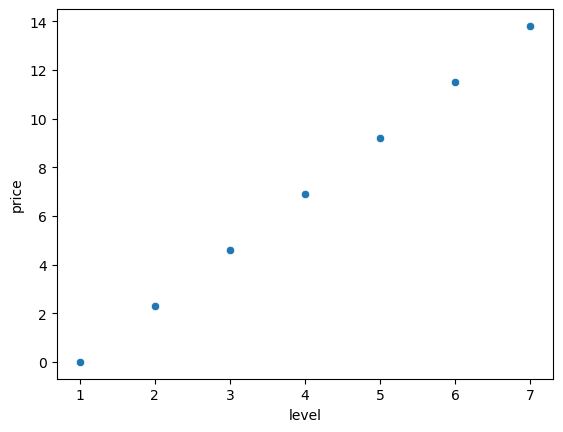

In [199]:
# sns.scatterplot(x='level', y='price', data=price_df)
# sns.scatterplot(x=price_df['level'], y=price_df['price'])
sns.scatterplot(x=price_df['level'], y=np.log(price_df['price']))

In [200]:
np.log(55)

4.007333185232471

In [201]:
np.exp(4.007333185232471)

55.000000000000014

원-핫 인코딩 (One hot encoding)

In [203]:
# 머신러닝은 숫자가 아니면 받아들이기 힘들다.
# 0과 1로 인코딩이 가능한 이유
# male, female 둘 중 하나를 0 또는 1로 설정을 하면, 데이터를 하나 지워도 구별이 가능하다.

In [205]:
pd.get_dummies(salary_df, columns=['Gender'], drop_first=True)

,Age,Education Level,Job Title,Years of Experience,Salary,Country,Race,Senior,CPi,Gender_Male
0,32.0,1,Software Engineer,5.0,90000,UK,White,0,132.00,True
1,28.0,2,Data Analyst,3.0,65000,USA,Hispanic,0,307.48,False
2,45.0,3,Manager,15.0,150000,Canada,White,1,158.70,True
3,36.0,1,Sales Associate,7.0,60000,USA,Hispanic,0,307.48,False
4,52.0,2,Director,20.0,200000,USA,Asian,0,307.48,True
...,...,...,...,...,...,...,...,...,...,...
6679,49.0,3,Director of Marketing,20.0,200000,UK,Mixed,0,132.00,False
6680,32.0,0,Sales Associate,3.0,50000,Australia,Australian,0,135.30,True
6681,30.0,1,Financial Manager,4.0,55000,China,Chinese,0,100.00,False
6682,46.0,2,Marketing Manager,14.0,140000,China,Korean,0,100.00,True


In [208]:
pd.set_option('display.max_columns',50)

In [209]:
pd.get_dummies(salary_df, columns=['Gender','Country','Race'], drop_first=True)

,Age,Education Level,Job Title,Years of Experience,Salary,Senior,CPi,Gender_Male,Country_Canada,Country_China,Country_UK,Country_USA,Race_Asian,Race_Australian,Race_Black,Race_Chinese,Race_Hispanic,Race_Korean,Race_Mixed,Race_Welsh,Race_White
0,32.0,1,Software Engineer,5.0,90000,0,132.00,True,False,False,True,False,False,False,False,False,False,False,False,False,True
1,28.0,2,Data Analyst,3.0,65000,0,307.48,False,False,False,False,True,False,False,False,False,True,False,False,False,False
2,45.0,3,Manager,15.0,150000,1,158.70,True,True,False,False,False,False,False,False,False,False,False,False,False,True
3,36.0,1,Sales Associate,7.0,60000,0,307.48,False,False,False,False,True,False,False,False,False,True,False,False,False,False
4,52.0,2,Director,20.0,200000,0,307.48,True,False,False,False,True,True,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6679,49.0,3,Director of Marketing,20.0,200000,0,132.00,False,False,False,True,False,False,False,False,False,False,False,True,False,False
6680,32.0,0,Sales Associate,3.0,50000,0,135.30,True,False,False,False,False,False,True,False,False,False,False,False,False,False
6681,30.0,1,Financial Manager,4.0,55000,0,100.00,False,False,True,False,False,False,False,False,True,False,False,False,False,False
6682,46.0,2,Marketing Manager,14.0,140000,0,100.00,True,False,True,False,False,False,False,False,False,False,True,False,False,False


In [212]:
salary_df['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [213]:
salary_df['Gender'].nunique()

2

In [215]:
salary_df[['Gender','Country','Race','Job Title']].nunique()


Gender         2
Country        5
Race          10
Job Title    129
dtype: int64

In [218]:
salary_df['Job Title'].value_counts().tail(20)
# 머신러닝 알고리즘에서 하나밖에 없는 정보는 예측에 큰 도움이 되지 않는다.

Job Title
Principal Scientist               1
Supply Chain Manager              1
Customer Success Rep              1
Technical Writer                  1
Developer                         1
CEO                               1
Chief Data Officer                1
Digital Content Producer          1
Customer Success Manager          1
Software Project Manager          1
Supply Chain Analyst              1
Office Manager                    1
Principal Engineer                1
Sales Operations Manager          1
Web Designer                      1
Director of Sales                 1
UX Researcher                     1
Director of Product Management    1
Consultant                        1
Human Resources Director          1
Name: count, dtype: int64

In [219]:
salary_df['Job Title'].unique()

array(['Software Engineer', 'Data Analyst', 'Manager', 'Sales Associate',
       'Director', 'Marketing Analyst', 'Product Manager',
       'Sales Manager', 'Marketing Coordinator', 'Scientist',
       'Software Developer', 'HR Manager', 'Financial Analyst',
       'Project Manager', 'Customer Service Rep', 'Operations Manager',
       'Marketing Manager', 'Engineer', 'Data Entry Clerk',
       'Sales Director', 'Business Analyst', 'VP of Operations',
       'IT Support', 'Recruiter', 'Financial Manager',
       'Social Media Specialist', 'Software Manager', 'Developer',
       'Consultant', 'Product Designer', 'CEO', 'Accountant',
       'Data Scientist', 'Marketing Specialist', 'Technical Writer',
       'HR Generalist', 'Project Engineer', 'Customer Success Rep',
       'Sales Executive', 'UX Designer', 'Operations Director',
       'Network Engineer', 'Administrative Assistant',
       'Strategy Consultant', 'Copywriter', 'Account Manager',
       'Director of Marketing', 'Help Des

In [222]:
job = pd.read_csv('job.csv')

In [223]:
salary_df.merge(job, on='Job Title', how='left')

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Country,Race,Senior,CPi,Jobs
0,32.0,Male,1,Software Engineer,5.0,90000,UK,White,0,132.00,Software
1,28.0,Female,2,Data Analyst,3.0,65000,USA,Hispanic,0,307.48,Data Analyst
2,45.0,Male,3,Manager,15.0,150000,Canada,White,1,158.70,Manager
3,36.0,Female,1,Sales Associate,7.0,60000,USA,Hispanic,0,307.48,Sales
4,52.0,Male,2,Director,20.0,200000,USA,Asian,0,307.48,Director
...,...,...,...,...,...,...,...,...,...,...,...
6669,49.0,Female,3,Director of Marketing,20.0,200000,UK,Mixed,0,132.00,Marketing
6670,32.0,Male,0,Sales Associate,3.0,50000,Australia,Australian,0,135.30,Sales
6671,30.0,Female,1,Financial Manager,4.0,55000,China,Chinese,0,100.00,Financial
6672,46.0,Male,2,Marketing Manager,14.0,140000,China,Korean,0,100.00,Marketing


In [224]:
salary_df = salary_df.merge(job, on='Job Title', how='left')

In [227]:
salary_df.drop('Job Title', axis=1, inplace=True)

In [228]:
salary_df.head()

,Age,Gender,Education Level,Years of Experience,Salary,Country,Race,Senior,CPi,Jobs
0,32.0,Male,1,5.0,90000,UK,White,0,132.00,Software
1,28.0,Female,2,3.0,65000,USA,Hispanic,0,307.48,Data Analyst
2,45.0,Male,3,15.0,150000,Canada,White,1,158.70,Manager
3,36.0,Female,1,7.0,60000,USA,Hispanic,0,307.48,Sales
4,52.0,Male,2,20.0,200000,USA,Asian,0,307.48,Director


In [231]:
salary_df['Jobs'].nunique()

60

In [232]:
salary_df['Jobs'].value_counts()

Jobs
Software                        2156
Marketing                        999
Data Scientist                   572
Sales                            453
HR                               420
Data Analyst                     389
Product Manager                  325
Project Engineer                 316
Financial                        200
Research                         195
Operations                       147
Web Developer                    129
Product Designer                  80
Receptionist                      57
Project Manager                   36
Business Analyst                  23
Graphic Designer                  23
Social Media                      18
Customer Service                  11
Business Development               7
UX                                 6
Accountant                         6
Business Development Manager       5
Account                            5
Delivery Driver                    5
Project Coordinator                4
Scientist                        

In [233]:
pd.get_dummies(salary_df, columns=['Gender','Country','Race','Jobs'], drop_first=True)

,Age,Education Level,Years of Experience,Salary,Senior,CPi,Gender_Male,Country_Canada,Country_China,Country_UK,Country_USA,Race_Asian,Race_Australian,Race_Black,Race_Chinese,Race_Hispanic,Race_Korean,Race_Mixed,Race_Welsh,Race_White,Jobs_Accountant,Jobs_Administrative,Jobs_Advertising Coordinator,Jobs_Business Analyst,Jobs_Business Development,...,Jobs_Network Engineer,Jobs_Office Manager,Jobs_Operations,Jobs_PR,Jobs_Product Designer,Jobs_Product Manager,Jobs_Project Coordinator,Jobs_Project Engineer,Jobs_Project Manager,Jobs_Quality Assurance,Jobs_Receptionist,Jobs_Recruiter,Jobs_Research,Jobs_Sales,Jobs_Scientist,Jobs_Social Media,Jobs_Software,Jobs_Supply Chain,Jobs_Supply Chain Manager,Jobs_Technical Support Specialist,Jobs_Technical Writer,Jobs_Training Specialist,Jobs_UX,Jobs_Web Designer,Jobs_Web Developer
0,32.0,1,5.0,90000,0,132.00,True,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False
1,28.0,2,3.0,65000,0,307.48,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,45.0,3,15.0,150000,1,158.70,True,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,36.0,1,7.0,60000,0,307.48,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
4,52.0,2,20.0,200000,0,307.48,True,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6669,49.0,3,20.0,200000,0,132.00,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
6670,32.0,0,3.0,50000,0,135.30,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
6671,30.0,1,4.0,55000,0,100.00,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
6672,46.0,2,14.0,140000,0,100.00,True,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


스케일링 (Scaling)

- standard scaling
x-mean(x) / sd(x)
mean(x)은 outliers에 영향을 많이 받으므로 standard scaling 은 outliers에 영향을 많이 받는다.

- robust scaling
x-Q2(x) / Q3(x)-Q1(x)
사분위로 계산되기 때문에 outliers 영향을 받지 않는다.

- min-max scaling
x-min(x) / max(x)-min(x)
최대값이 1, 최소값이 0인 형태로 재배열

- 언제 사용하나요?
각 변수의 크기가 중요하게 적용할 때
예) KNN



In [235]:
salary_df['Age'].mean()

33.61282589151933

In [236]:
salary_df['Age'].std()

7.594369005848066

In [237]:
(salary_df['Age'] - 33.61282589151933) / 7.594369005848066

0      -0.212371
1      -0.739077
2       1.499423
3       0.314335
4       2.421159
          ...   
6669    2.026129
6670   -0.212371
6671   -0.475724
6672    1.631100
6673   -1.002430
Name: Age, Length: 6674, dtype: float64

In [238]:
salary_df['Age'].quantile(0.75)

38.0

In [239]:
(salary_df['Age'] - salary_df['Age'].quantile(0.5)) / (salary_df['Age'].quantile(0.75) - salary_df['Age'].quantile(0.25))

0       0.0
1      -0.4
2       1.3
3       0.4
4       2.0
       ... 
6669    1.7
6670    0.0
6671   -0.2
6672    1.4
6673   -0.6
Name: Age, Length: 6674, dtype: float64

In [243]:
(salary_df['Age'] - salary_df['Age'].min()) / (salary_df['Age'].max() - salary_df['Age'].min())

0       0.268293
1       0.170732
2       0.585366
3       0.365854
4       0.756098
          ...   
6669    0.682927
6670    0.268293
6671    0.219512
6672    0.609756
6673    0.121951
Name: Age, Length: 6674, dtype: float64

In [287]:
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler

In [288]:
ss = StandardScaler()
rs = RobustScaler()
mm = MinMaxScaler()

In [289]:
# ss.transform(salary_df)
# ss.fit(salary_df)

In [269]:
# pd.DataFrame(ss.transform(salary_df))

# 컬럼 이름이 사라짐
# 지정을 위해서 columns=[] 형태로 지정해줌
# salary_df.columns의 결과를 s넣어주면 된다.

# pd.DataFrame(ss.transform(salary_df), columns = salary_df.columns)
# ss_df = pd.DataFrame(ss.transform(salary_df), columns = salary_df.columns)

In [270]:
# rs.fit(salary_df)
# pd.DataFrame(rs.transform(salary_df), column=salary_df.columns)
# rs_df = pd.DataFrame(rs.transform(salary_df), column=salary_df.columns)

In [271]:
# mm.fit(salary_df)
# pd.DataFrame(mm.transform(salary_df), column=salary_df.columns)
# mm_df = pd.DataFrame(mm.transform(salary_df), column=salary_df.columns)

In [272]:
# 결과보기
# ss_df.describee
# rs_df.describe
# mm_df.describe

In [273]:
# fit_transform 을 하면 동시에 진행된다.
# fit, transform, fit_transform 각각에 대해 어떻게 다르고,
# 어떤 상황에 적용해야 하는지를 알아야 함


주성분 분석 (PCA), 복습 (Recap)

PCA? 데이터의 차원을 축소하는 기법(차원 = 변수의 수)
Principal Component Analysis

차원이 줄여지면 데이터 손실이 발생할 수도 그렇지 않을숟도 있다.

만약 차원이 2차원이라면 PCA선?도 2개가 있어야 한다.
하나를 그어주고 나머지는 직교하는 선으로 그어주어야 데이터 손실이 덜하다.
이것은 예시일 뿐, 우리는 약 80여개의 변수로 분석해야 한다.
만약 80차원이라면 PCA를 돌렸을 때 주성분도 80개가 나온다.
따라서 데이터를 많이 함유하고 있는 주성분을 선택하여 사용한다.

In [274]:
from sklearn.decomposition import PCA

In [276]:
pca = PCA()

In [279]:
# pca.fit(salary_df)
# 이 데이터를 학습시키겠습니다~
# pca.transform(salary_df)
# 변환시키겠습니다~
# pd.DataFrame(pca.transform(salary_df))
# DataFrame으로 변환하겠습니다~

In [280]:
pca = PCA(2)
# 2개의 주성분을 선택하겠다

In [282]:
# pca.transform(salary_df)
# pd.DataFrame(pca.fit_transform(salary_df), columns=['PC1','PC2'])
# 전체 변수 개수에서 2개로 줄어들었다.

In [283]:
# pca.explained_variance_ratio
# PC1, PC2의 정보 크기가 출력된다.

# (pca.explained_variance_ratio).sum()
# 두 주성분의 합을 구한다. ex) N
# 출력되는 값의 의미는 두 개의 주성분이 N% 만큼 데이터를 포함하고 있다는 말



## 주성분을 쓰는 이유
- 변수의 개수, 차원을 줄이기 위해서 사용된다.
- 데이터 시각화

## 주성분 사용의 단점
PC1, PC2.. 기존 변수에서 다양한 특성을 반영하지만
해당 변수의 특성을 설명할 길이 없다.


In [286]:
# salary_df.corr()
# 변수 간 상관관계